In [272]:
import numpy as np
import pandas as pd

In [273]:
df=pd.read_csv('supermarket_sales - Sheet1.csv', usecols=['Date','cogs'] )

In [274]:
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA

In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1000 non-null   object 
 1   cogs    1000 non-null   float64
dtypes: float64(1), object(1)
memory usage: 15.8+ KB


In [276]:
df['Date'] = pd.to_datetime(df['Date'])

In [277]:
df.head()

,Date,cogs
0,2019-01-05,522.83
1,2019-03-08,76.40
2,2019-03-03,324.31
3,2019-01-27,465.76
4,2019-02-08,604.17


In [278]:
daily_sales = df.groupby(by=['Date'])['cogs'].sum()

In [279]:
daily_sales = pd.DataFrame(daily_sales, columns=['cogs'])

In [280]:
daily_sales

,cogs
Date,
2019-01-01,4519.22
2019-01-02,1852.86
2019-01-03,1979.17
2019-01-04,1546.37
2019-01-05,3368.27
...,...
2019-03-26,1869.06
2019-03-27,2764.59
2019-03-28,2123.24


In [281]:
print(daily_sales.columns)

Index(['cogs'], dtype='object')


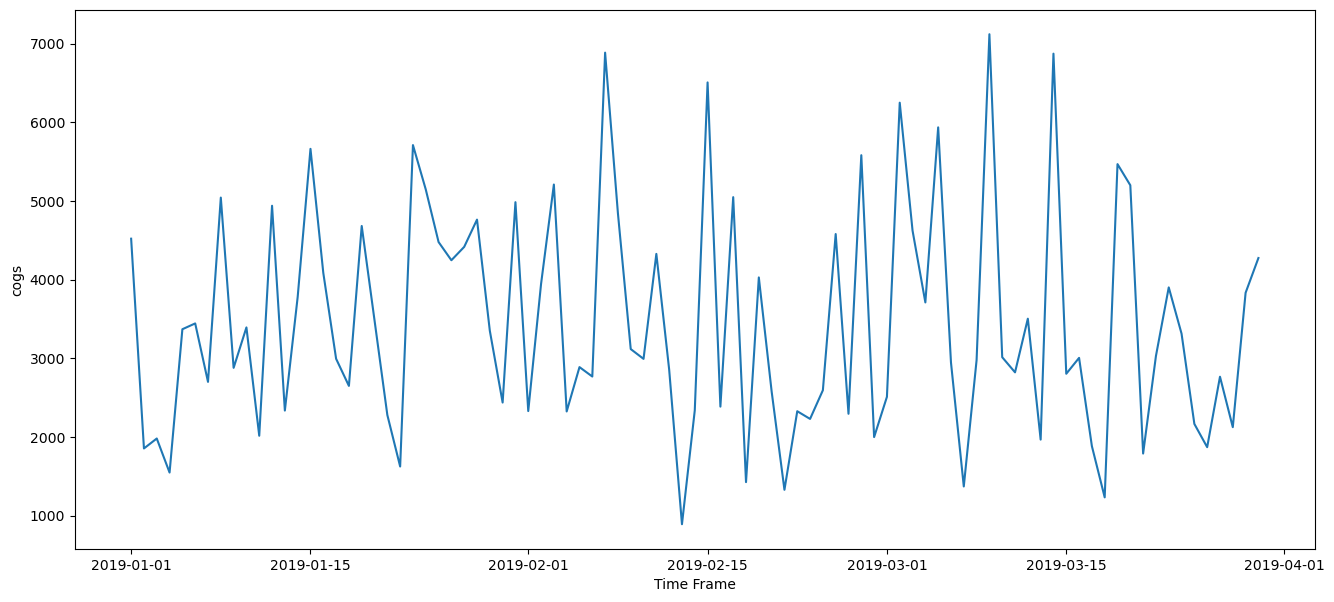

In [282]:
plt.figure(figsize=(16,7))
plt.plot(daily_sales.index, daily_sales['cogs'])
plt.xlabel('Time Frame')
plt.ylabel('cogs')
plt.show()

<Axes: xlabel='Date'>

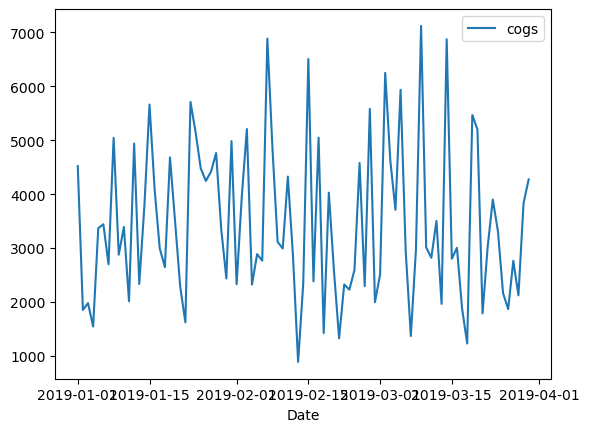

In [283]:
sns.lineplot(daily_sales)

In [284]:
from statsmodels.tsa.stattools import adfuller

In [285]:
test_result=adfuller(daily_sales['cogs'])

In [286]:
#Ho: It is non stationary
#H1: It is stationary
def adfuller_test(cogs):
    result=adfuller(cogs)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [287]:
adfuller_test(daily_sales['cogs'])

ADF Test Statistic : -7.654895726803349
p-value : 1.7495640309589164e-11
#Lags Used : 1
Number of Observations Used : 87
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [288]:
daily_sales['cogs First Difference'] = daily_sales['cogs'] - daily_sales['cogs'].shift(1)

In [289]:
daily_sales['cogs'].shift(1)

Date
2019-01-01        NaN
2019-01-02    4519.22
2019-01-03    1852.86
2019-01-04    1979.17
2019-01-05    1546.37
               ...   
2019-03-26    2164.73
2019-03-27    1869.06
2019-03-28    2764.59
2019-03-29    2123.24
2019-03-30    3831.66
Name: cogs, Length: 89, dtype: float64

In [290]:
daily_sales['Seasonal First Difference']=daily_sales['cogs']-daily_sales['cogs'].shift(17)

In [291]:
daily_sales.head(14)

,cogs,cogs First Difference,Seasonal First Difference
Date,,,
2019-01-01,4519.22,NaN,NaN
2019-01-02,1852.86,-2666.36,NaN
2019-01-03,1979.17,126.31,NaN
2019-01-04,1546.37,-432.80,NaN
2019-01-05,3368.27,1821.90,NaN
2019-01-06,3442.10,73.83,NaN
2019-01-07,2699.28,-742.82,NaN
2019-01-08,5041.65,2342.37,NaN
2019-01-09,2877.47,-2164.18,NaN


In [292]:
## Again test dickey fuller test
adfuller_test(daily_sales['Seasonal First Difference'].dropna())

ADF Test Statistic : -6.974822241820081
p-value : 8.48176814186978e-10
#Lags Used : 1
Number of Observations Used : 70
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Date'>

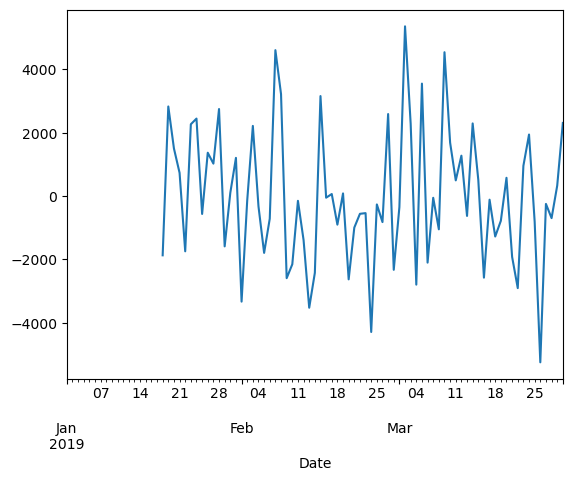

In [293]:
daily_sales['Seasonal First Difference'].plot()

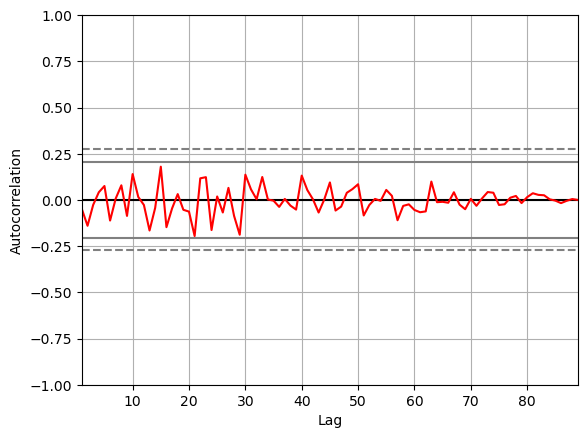

In [294]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(daily_sales['cogs'], color='red')
plt.show()

In [295]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

/Users/adityasahu/anaconda3/lib/python3.11/site-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


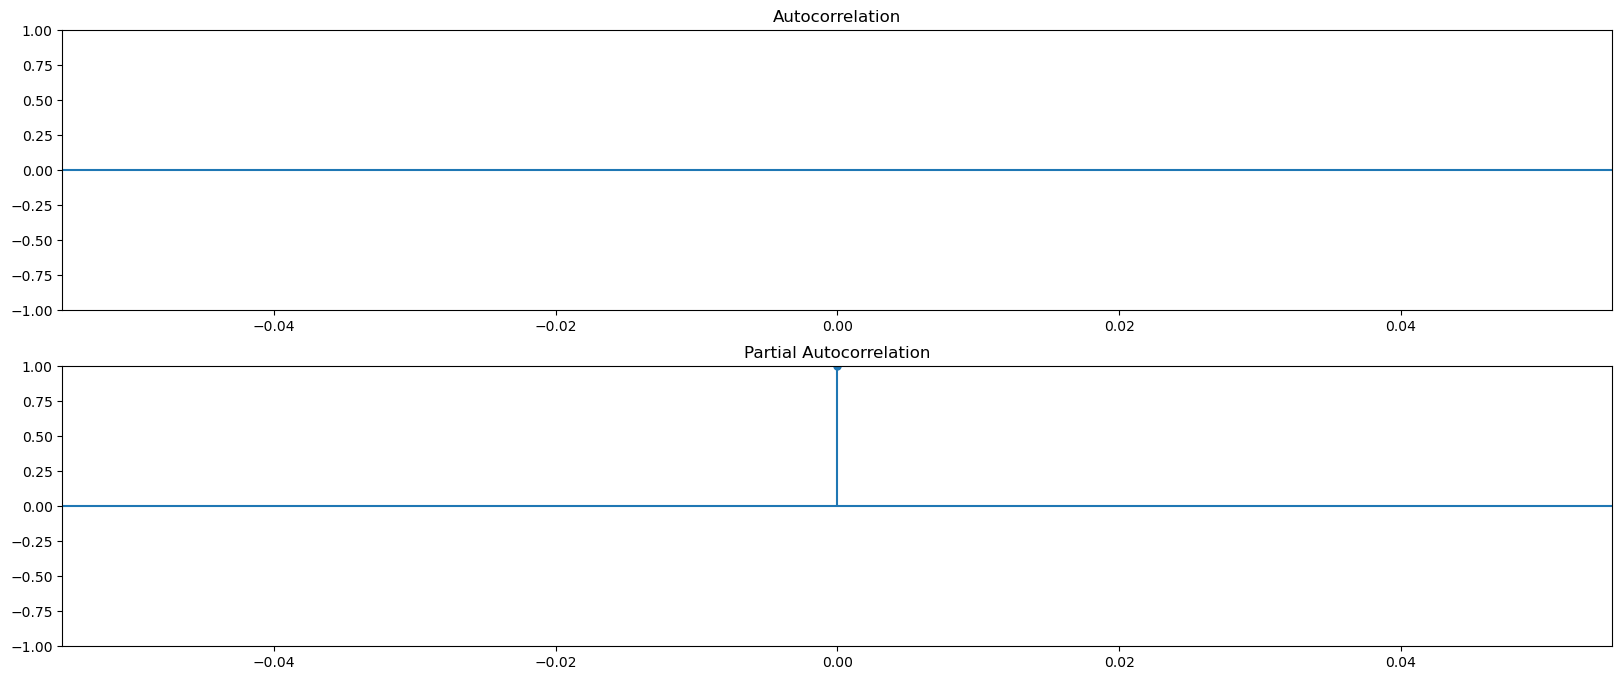

In [296]:
fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(daily_sales['Seasonal First Difference'].iloc[4:],lags=3,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(daily_sales['Seasonal First Difference'].iloc[4:],lags=3,ax=ax2)

In [297]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima.model import ARIMA

In [301]:
model1=ARIMA(daily_sales['cogs'],order=(1,1,0))
model1_fit=model.fit()

/Users/adityasahu/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/adityasahu/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/adityasahu/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.33611D+00    |proj g|=  4.60763D-02

At iterate    5    f=  7.33123D+00    |proj g|=  8.46969D-05

At iterate   10    f=  7.33122D+00    |proj g|=  1.83338D-03

At iterate   15    f=  7.33015D+00    |proj g|=  2.34642D-02

At iterate   20    f=  7.31107D+00    |proj g|=  2.70199D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     27      1     0     0   1.488D-05   7.310D+00
  F =   7.3099836432016279     

CONVERG

In [302]:
model1_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                               cogs   No. Observations:                   89
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 17)   Log Likelihood                -650.589
Date:                            Thu, 04 Apr 2024   AIC                           1307.177
Time:                                    16:07:20   BIC                           1313.965
Sample:                                01-01-2019   HQIC                          1309.876
                                     - 03-30-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4663      0.146     -3.188      0.001      -0.753      -0.180
ar.S.L17      -0.5731      0.087     -6.555      0.000      -0.745      -0.402
sigma2      5.279e+06   9.84e+05      5.366      0.000    3.35e+06    7.21e+06
===================================================================================
Ljung-Box (L1) (Q):                   2.18   Jarque-Bera (JB):                 0.21
Prob(Q):                              0.14   Prob(JB):                         0.90
Heteroskedasticity (H):               1.06   Skew:                             0.03
Prob(H) (two-sided):                  0.88   Kurtosis:                         2.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='Date'>

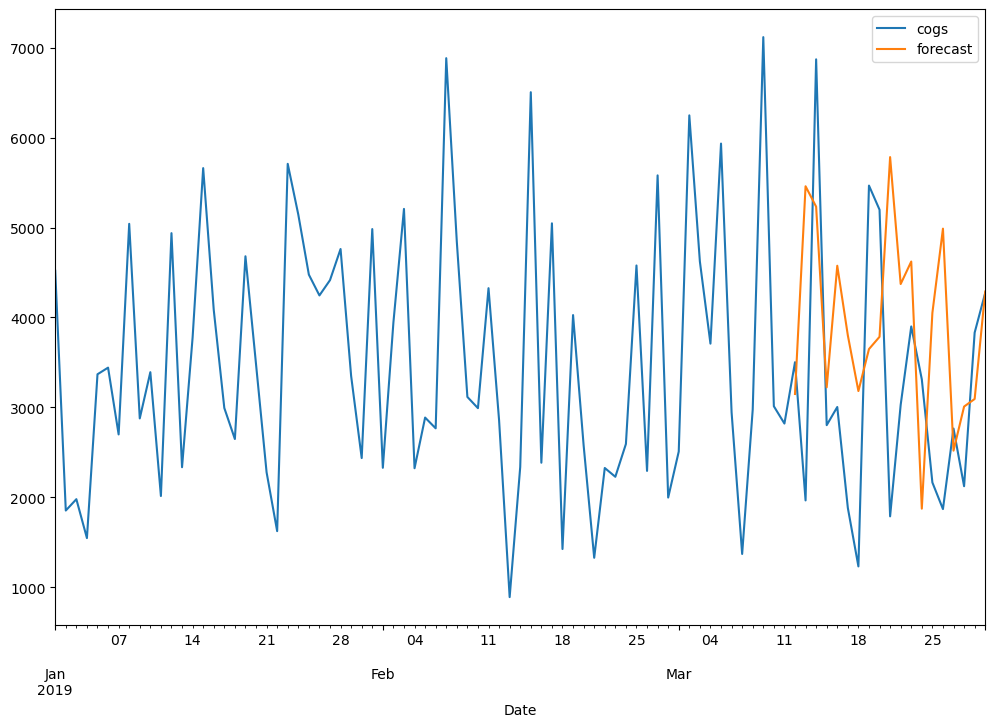

In [303]:
daily_sales['forecast']=model1_fit.predict(start=70,end=88,dynamic=True)
daily_sales[['cogs','forecast']].plot(figsize=(12,8))

In [259]:
import statsmodels.api as sm

In [260]:
model=sm.tsa.statespace.SARIMAX(daily_sales['cogs'],order=(1, 1, 0),seasonal_order=(1,1,0,17))
results=model.fit()

/Users/adityasahu/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/adityasahu/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.33611D+00    |proj g|=  4.60763D-02

At iterate    5    f=  7.33123D+00    |proj g|=  8.46969D-05

At iterate   10    f=  7.33122D+00    |proj g|=  1.83338D-03

At iterate   15    f=  7.33015D+00    |proj g|=  2.34642D-02

At iterate   20    f=  7.31107D+00    |proj g|=  2.70199D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     27      1     0     0   1.488D-05   7.310D+00
  F =   7.3099836432016279     

CONVERG

<Axes: xlabel='Date'>

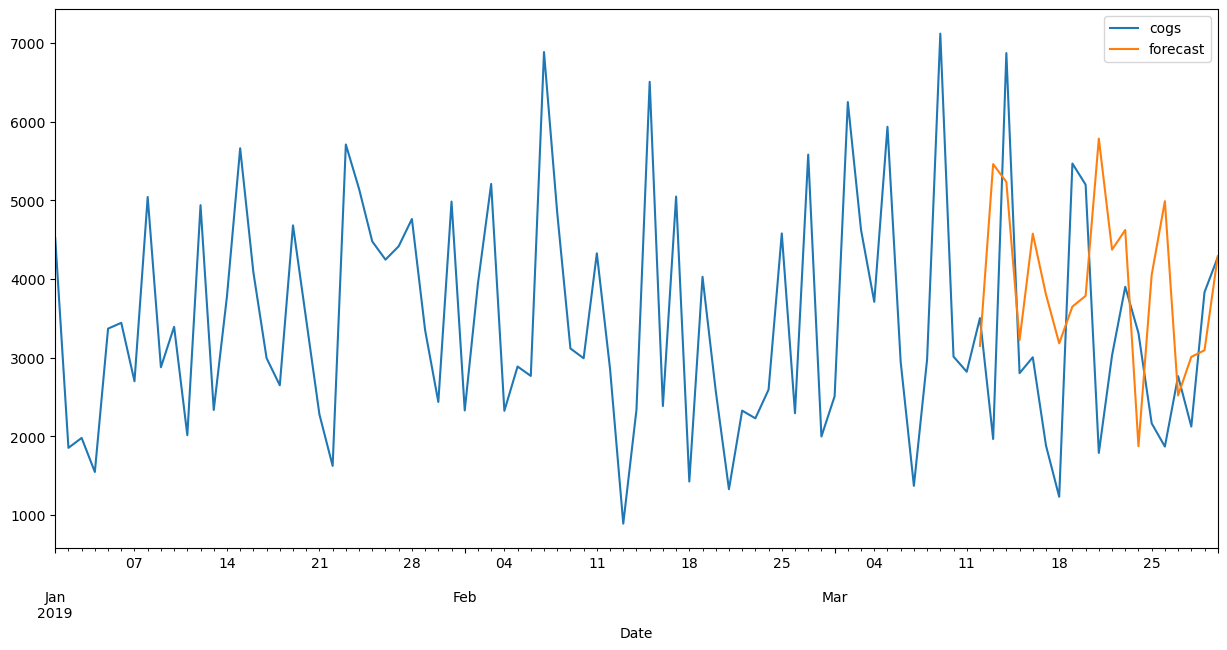

In [261]:
daily_sales['forecast']=results.predict(start=70,end=88,dynamic=True)
daily_sales[['cogs','forecast']].plot(figsize=(15,7))

<Axes: xlabel='Date'>

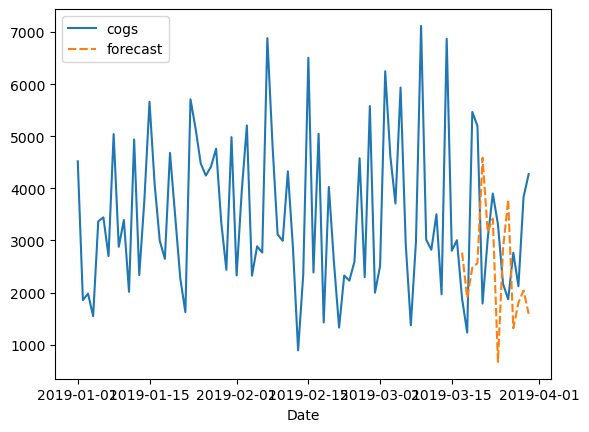

In [262]:
daily_sales['forecast']=results.predict(start=75,end=88,dynamic=True)
sns.lineplot(daily_sales[['cogs','forecast']])

In [263]:
from pandas.tseries.offsets import DateOffset
future_dates=[daily_sales.index[-1]+ DateOffset(days=x)for x in range(0,24)]

In [264]:

future_datest_df=pd.DataFrame(index=future_dates[1:],columns=daily_sales.columns)

In [265]:

future_datest_df.tail()

,cogs,cogs First Difference,Seasonal First Difference,forecast
2019-04-18,NaN,NaN,NaN,NaN
2019-04-19,NaN,NaN,NaN,NaN
2019-04-20,NaN,NaN,NaN,NaN
2019-04-21,NaN,NaN,NaN,NaN
2019-04-22,NaN,NaN,NaN,NaN


In [266]:
future_df=pd.concat([daily_sales,future_datest_df])

<Axes: >

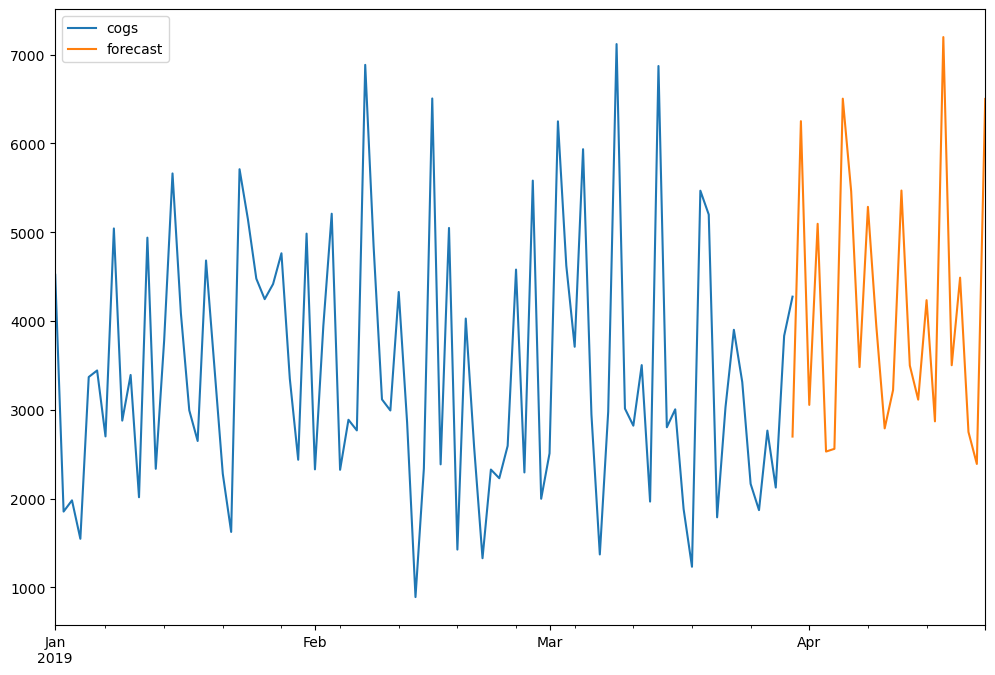

In [305]:
future_df['forecast'] = results.predict(start = 88, end = 150, dynamic= True)  
future_df[['cogs', 'forecast']].plot(figsize=(12, 8)) 

<Axes: >

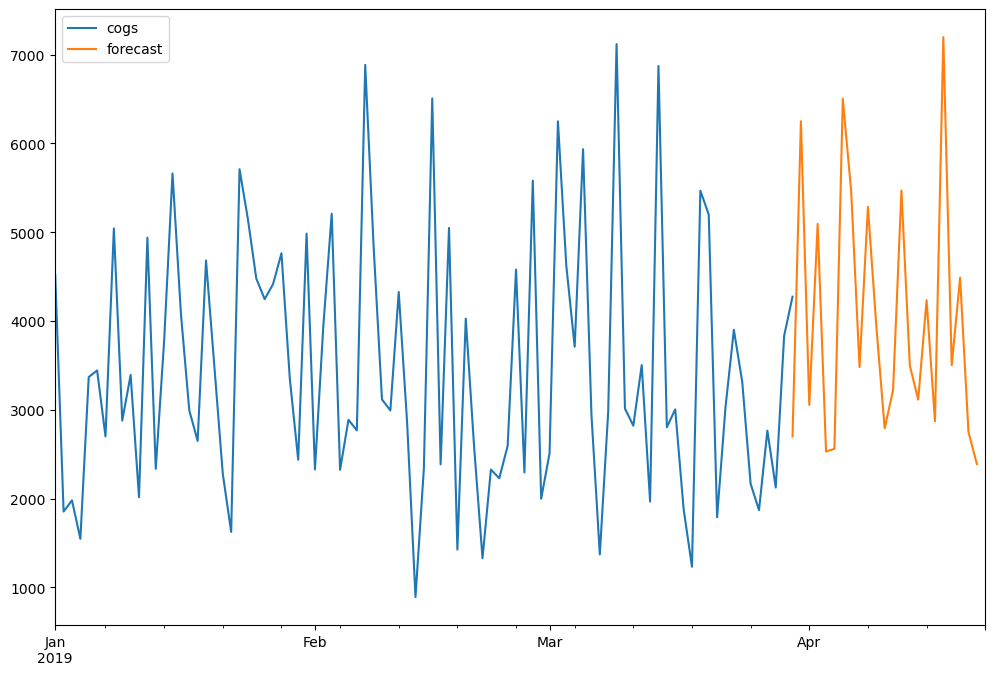

In [304]:
future_df['forecast'] = model1_fit.predict(start = 88, end = 110, dynamic= True)  
future_df[['cogs', 'forecast']].plot(figsize=(12, 8)) 